# Enunciado
Implementar y analizar el comportamiento del enfriamiento simulado para alcanzar
la solución óptima del problema que se describe a continuación:

Obtener el mínimo global de la siguiente función:

$$
f(x) = \dfrac{cos(x)}{x}, x \in [0,30]
$$

Mostrar gráficamente la evolución de los valores de $x$ y $f$ considerados a lo largo de
las iteraciones de la metaheurística.



##### La siguiente celda muestra los imports necesarios para poder ejecutar el agoritmo

In [1]:
import funciones as fn
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt
import graficos as gf
import termometro as trm
from random import randrange

print("Se han cargado todas las librerias necesarias")

Se han cargado todas las librerias necesarias


### Seleccionar las características del algoritmo

#### Seleccionar la función a optimizar, definir el intervalo.

In [2]:
INTERVALO = (0,30)
FUNCION  = fn.funcion_enunciado

### Funciones del algoritmo

Obtener un vecino a una solución

In [3]:
def vecindad(x, movimiento=1):
    vecindad = (INTERVALO[1] - INTERVALO[0]) * movimiento / 10
    delta = (-vecindad/2.) + vecindad * rnd.random_sample()
    return fn.ajustar_valor(delta+x, INTERVALO)

Probabilidad con la que se va a aceptar una solución

In [4]:
def probabilidad_aceptacion(y, y_nuevo, temperatura):
    # si mejora la solución actual se acepta siempre
    if y_nuevo < y:
        return 1
    # en caso contrario, la aceptación dependerá de la temperatura,
    # a medida que avanza el problema menor temperatura, menor probabilidad de aceptación
    else:
        probabilidad = np.exp(- (y_nuevo - y) / temperatura)
        return probabilidad

Variación de la temperatura a medida que avanza el algoritmo

In [5]:
def get_temperatura(estado = -1, iteracion = -1, descanso = 0, temperatura_actual = -1, alpha = 0.95, temperatura_inicial = 1, constante = 0, temperatura_final = -1, n_entornos = -1, beta = -1):
    if estado != -1:
        return trm.temperatura_adicional(estado)
    elif constante != 0:
        return trm.temperatura_hajek(iteracion, constante)
    elif beta != -1:
        return trm.temperatura_lundy(temperatura_actual, beta)
    else:
        return trm.temperatura_kirkpatrick(iteracion, descanso, temperatura_actual, alpha, temperatura_inicial)

### Algoritmo

Algoritmo en pseudocódigo aquí

In [6]:
def recocido_simulado(funcion,
                      vecindad,
                      x_inicial,
                      probabilidad_aceptacion,
                      max_iteraciones=10000,
                      informacion=1):
    T = 1
    x = x_inicial
    y = funcion(x)
    valores_x, valores_y = [x], [y]
    valores_t = []
    for iteracion in range(max_iteraciones):
        estado = iteracion / float(max_iteraciones)
        #Es necesario pasar los parámetros necesarios para el algoritmo elegido,
        T = get_temperatura(iteracion = iteracion, descanso = 100, temperatura_actual = T)
        valores_t.append(T)
        x_vecina = vecindad(x, estado)
        y_vecina = funcion(x_vecina)
        if informacion >= 1:
            print("Iteracion {:>2}/{:>2} : T = {:>4.3g}, x = {:>4.3g}, y = {:>4.3g}, x_vecina = {:>4.3g}, y_vecina = {:>4.3g}".format(iteracion, max_iteraciones, T, x, y, x_vecina, y_vecina))
        if probabilidad_aceptacion(y, y_vecina, T) > rnd.random():
            x,y = x_vecina, y_vecina
            valores_x.append(x)
            valores_y.append(y)
    return x, funcion(x), valores_x, valores_y, valores_t

### Ejecución del algoritmo

In [7]:
x, y, valores_x, valores_y, valores_t = recocido_simulado(FUNCION, vecindad, randrange(INTERVALO[0],INTERVALO[1]), probabilidad_aceptacion,informacion=1)

Iteracion  0/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  1/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  2/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  3/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  4/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  5/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  6/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  7/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  8/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion  9/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion 10/10000 : T =    1, x =    3, y = -0.33, x_vecina =    3, y_vecina = -0.33
Iteracion 11/10000 : T =    1, x =    3, y = -0.33, x_

Iteracion 2454/10000 : T = 0.292, x = 13.1, y = 0.064, x_vecina = 13.2, y_vecina = 0.0614
Iteracion 2455/10000 : T = 0.292, x = 13.2, y = 0.0614, x_vecina = 13.3, y_vecina = 0.0534
Iteracion 2456/10000 : T = 0.292, x = 13.3, y = 0.0534, x_vecina = 13.5, y_vecina = 0.0446
Iteracion 2457/10000 : T = 0.292, x = 13.5, y = 0.0446, x_vecina = 13.8, y_vecina = 0.0269
Iteracion 2458/10000 : T = 0.292, x = 13.8, y = 0.0269, x_vecina =   14, y_vecina = 0.00817
Iteracion 2459/10000 : T = 0.292, x =   14, y = 0.00817, x_vecina = 13.8, y_vecina = 0.0219
Iteracion 2460/10000 : T = 0.292, x = 13.8, y = 0.0219, x_vecina = 13.6, y_vecina = 0.0352
Iteracion 2461/10000 : T = 0.292, x = 13.6, y = 0.0352, x_vecina = 13.9, y_vecina = 0.0198
Iteracion 2462/10000 : T = 0.292, x = 13.9, y = 0.0198, x_vecina = 13.7, y_vecina = 0.0336
Iteracion 2463/10000 : T = 0.292, x = 13.7, y = 0.0336, x_vecina =   14, y_vecina = 0.00883
Iteracion 2464/10000 : T = 0.292, x =   14, y = 0.00883, x_vecina = 13.7, y_vecina = 0.0

Iteracion 4836/10000 : T = 0.0853, x = 9.87, y = -0.0915, x_vecina = 9.75, y_vecina = -0.0972
Iteracion 4837/10000 : T = 0.0853, x = 9.75, y = -0.0972, x_vecina = 9.36, y_vecina = -0.107
Iteracion 4838/10000 : T = 0.0853, x = 9.36, y = -0.107, x_vecina =  8.9, y_vecina = -0.0974
Iteracion 4839/10000 : T = 0.0853, x =  8.9, y = -0.0974, x_vecina = 8.57, y_vecina = -0.0769
Iteracion 4840/10000 : T = 0.0853, x = 8.57, y = -0.0769, x_vecina = 8.49, y_vecina = -0.0696
Iteracion 4841/10000 : T = 0.0853, x = 8.49, y = -0.0696, x_vecina = 7.86, y_vecina = -0.000353
Iteracion 4842/10000 : T = 0.0853, x = 7.86, y = -0.000353, x_vecina = 8.38, y_vecina = -0.06
Iteracion 4843/10000 : T = 0.0853, x = 8.38, y = -0.06, x_vecina = 7.96, y_vecina = -0.0132
Iteracion 4844/10000 : T = 0.0853, x = 7.96, y = -0.0132, x_vecina = 8.39, y_vecina = -0.061
Iteracion 4845/10000 : T = 0.0853, x = 8.39, y = -0.061, x_vecina =  8.8, y_vecina = -0.0922
Iteracion 4846/10000 : T = 0.0853, x =  8.8, y = -0.0922, x_veci

Iteracion 7042/10000 : T = 0.0276, x =  8.9, y = -0.0973, x_vecina =  8.3, y_vecina = -0.0519
Iteracion 7043/10000 : T = 0.0276, x =  8.9, y = -0.0973, x_vecina = 8.18, y_vecina = -0.0393
Iteracion 7044/10000 : T = 0.0276, x =  8.9, y = -0.0973, x_vecina = 7.94, y_vecina = -0.0113
Iteracion 7045/10000 : T = 0.0276, x =  8.9, y = -0.0973, x_vecina = 8.31, y_vecina = -0.0531
Iteracion 7046/10000 : T = 0.0276, x = 8.31, y = -0.0531, x_vecina =    9, y_vecina = -0.101
Iteracion 7047/10000 : T = 0.0276, x =    9, y = -0.101, x_vecina = 8.59, y_vecina = -0.0785
Iteracion 7048/10000 : T = 0.0276, x =    9, y = -0.101, x_vecina = 8.18, y_vecina = -0.0394
Iteracion 7049/10000 : T = 0.0276, x =    9, y = -0.101, x_vecina = 7.95, y_vecina = -0.0124
Iteracion 7050/10000 : T = 0.0276, x =    9, y = -0.101, x_vecina = 8.71, y_vecina = -0.0866
Iteracion 7051/10000 : T = 0.0276, x =    9, y = -0.101, x_vecina = 8.43, y_vecina = -0.0651
Iteracion 7052/10000 : T = 0.0276, x =    9, y = -0.101, x_vecina 

Iteracion 9452/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 3.61, y_vecina = -0.247
Iteracion 9453/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.76, y_vecina = -0.106
Iteracion 9454/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.54, y_vecina = 0.0194
Iteracion 9455/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.47, y_vecina = 0.0668
Iteracion 9456/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.61, y_vecina = -0.0224
Iteracion 9457/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 2.25, y_vecina = -0.28
Iteracion 9458/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.98, y_vecina = -0.203
Iteracion 9459/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.16, y_vecina = 0.349
Iteracion 9460/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.13, y_vecina = 0.382
Iteracion 9461/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.74, y_vecina = -0.0988
Iteracion 9462/10000 : T = 0.01, x = 2.49, y = -0.319, x_vecina = 1.49, y_vecina = 0.0544
Iteracion 9

### Visualización de los resultados del algoritmo

Solución x: 2.6856016050025464
Calidad de la solución x, f(x):-0.33431059057547674


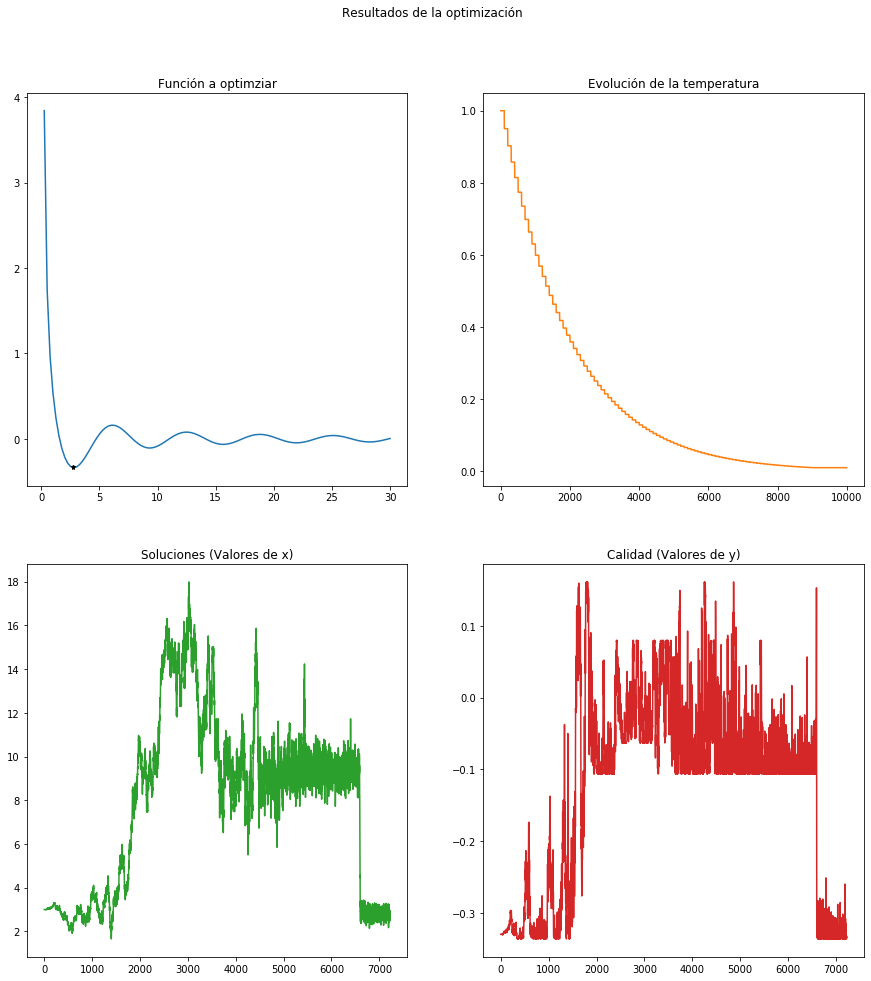

In [8]:
gf.plot_results(FUNCION, INTERVALO, valores_x, valores_y, valores_t)